In [1]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each 28*28-pixel image into a 784-dimensional feature before feeding it to the network.
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#scale values between 0 and 1 and convert data to a float.
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#Convert the labels' encoding from integer to one-hot. LabelEncoder() is performing the same function as to_categorical.
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

(28, 28)
784
Epoch 1/10
235/235 [==============================] - 9s 35ms/step - loss: 0.2922 - accuracy: 0.9108 - val_loss: 0.1210 - val_accuracy: 0.9613
Epoch 2/10
235/235 [==============================] - 6s 25ms/step - loss: 0.0994 - accuracy: 0.9691 - val_loss: 0.0993 - val_accuracy: 0.9683
Epoch 3/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0626 - accuracy: 0.9808 - val_loss: 0.0778 - val_accuracy: 0.9757
Epoch 4/10
235/235 [==============================] - 5s 23ms/step - loss: 0.0437 - accuracy: 0.9863 - val_loss: 0.0710 - val_accuracy: 0.9791
Epoch 5/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0308 - accuracy: 0.9906 - val_loss: 0.0778 - val_accuracy: 0.9763
Epoch 6/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0231 - accuracy: 0.9926 - val_loss: 0.0690 - val_accuracy: 0.9805
Epoch 7/10
235/235 [==============================] - 5s 19ms/step - loss: 0.0174 - accuracy: 0.9944 - val_loss: 0.0821 - val_acc

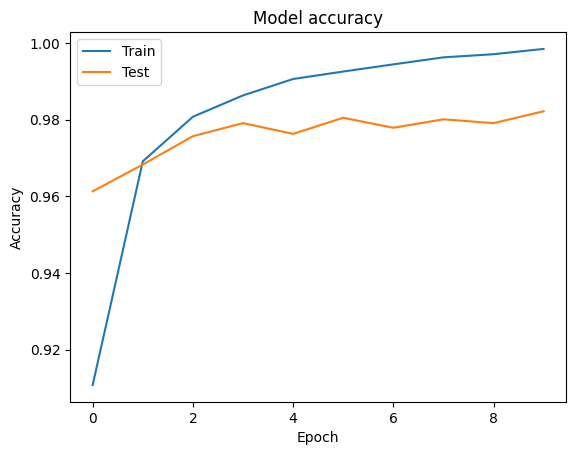

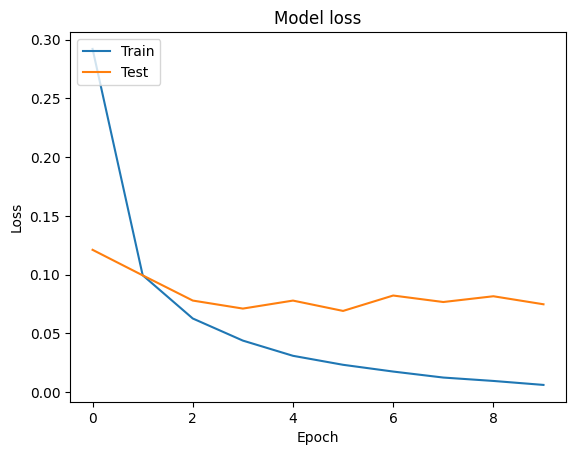

In [2]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


1/1 [==============================] - 0s 125ms/step
Predicted digit: 8


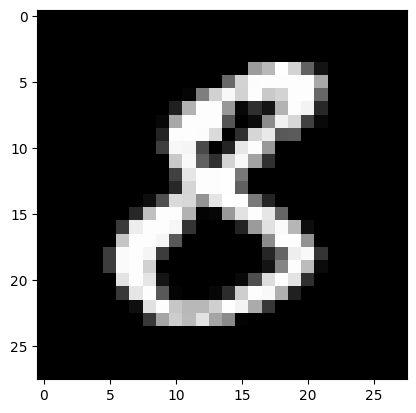

In [3]:
import matplotlib.pyplot as plt

# select a random image from test data
image_index = 1234
img = test_images[image_index]

# plot the image
plt.imshow(img, cmap='gray')

# reshape image to 1D vector
img = img.reshape((1, 784))

# normalize pixel values
img = img / 255.0

# predict class of image
result = model.predict(img)
print("Predicted digit:", np.argmax(result))

In [4]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model.add(Dense(256, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

(28, 28)
784
Epoch 1/10
235/235 [==============================] - 5s 18ms/step - loss: 0.3312 - accuracy: 0.8989 - val_loss: 0.1972 - val_accuracy: 0.9403
Epoch 2/10
235/235 [==============================] - 5s 21ms/step - loss: 0.1506 - accuracy: 0.9548 - val_loss: 0.2040 - val_accuracy: 0.9355
Epoch 3/10
235/235 [==============================] - 4s 19ms/step - loss: 0.1002 - accuracy: 0.9693 - val_loss: 0.1073 - val_accuracy: 0.9680
Epoch 4/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0724 - accuracy: 0.9774 - val_loss: 0.1030 - val_accuracy: 0.9685
Epoch 5/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0541 - accuracy: 0.9831 - val_loss: 0.1008 - val_accuracy: 0.9685
Epoch 6/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0399 - accuracy: 0.9875 - val_loss: 0.1039 - val_accuracy: 0.9660
Epoch 7/10
235/235 [==============================] - 3s 15ms/step - loss: 0.0304 - accuracy: 0.9909 - val_loss: 0.0765 - val_acc

In [5]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each 28*28-pixel image into a 784-dimensional feature before feeding it to the network.
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#scale values between 0 and 1 and convert data to a float.
train_data = train_data.astype('float')
test_data = test_data.astype('float')

#Convert the labels' encoding from integer to one-hot. LabelEncoder() is performing the same function as to_categorical.
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))
test_loss, test_acc = model.evaluate(test_data, test_labels_one_hot, verbose=0)
print(f'Test loss: {test_loss:.3f}, Test accuracy: {test_acc:.3f}')

(28, 28)
784
Epoch 1/10
235/235 [==============================] - 6s 24ms/step - loss: 6.9188 - accuracy: 0.8744 - val_loss: 0.6426 - val_accuracy: 0.9334
Epoch 2/10
235/235 [==============================] - 5s 21ms/step - loss: 0.4380 - accuracy: 0.9470 - val_loss: 0.5196 - val_accuracy: 0.9364
Epoch 3/10
235/235 [==============================] - 6s 23ms/step - loss: 0.2572 - accuracy: 0.9610 - val_loss: 0.3742 - val_accuracy: 0.9494
Epoch 4/10
235/235 [==============================] - 4s 18ms/step - loss: 0.1904 - accuracy: 0.9685 - val_loss: 0.3935 - val_accuracy: 0.9389
Epoch 5/10
235/235 [==============================] - 4s 19ms/step - loss: 0.1626 - accuracy: 0.9728 - val_loss: 0.3936 - val_accuracy: 0.9490
Epoch 6/10
235/235 [==============================] - 4s 19ms/step - loss: 0.1353 - accuracy: 0.9764 - val_loss: 0.3315 - val_accuracy: 0.9640
Epoch 7/10
235/235 [==============================] - 5s 22ms/step - loss: 0.1337 - accuracy: 0.9789 - val_loss: 0.3299 - val_acc